# k-최근접 이웃 회귀

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/3-1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 데이터 준비

In [1]:
import numpy as np

In [2]:
# 농어

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [5]:
import matplotlib.pyplot as plt

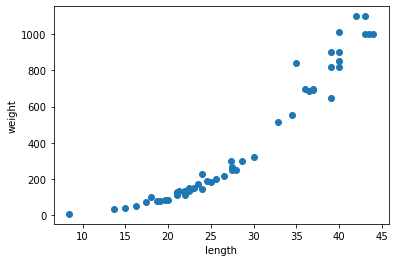

In [7]:
# 회귀랑 knn회귀랑 차이점이 knn회귀는 구간을 벗어나면 예측이 어렵다

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

In [11]:
# 훈련 자료와 테스트 자료로 분할
# 예측 문제에서는 층고려 하지 않아도 괜찮...

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42) # defalut 0.25 로 분할

In [12]:
print(train_input.shape, test_input.shape)

(42,) (14,)


In [0]:
# 아래 코드의 주석을 제거하고 실행하면 에러가 발생합니다
# test_array = test_array.reshape(2, 3)

In [14]:
# sklearn 형식에 맞게 2차원 배열로 변환
train_input = train_input.reshape(-1, 1) # -1 기본 dimension에 맞춰라
test_input = test_input.reshape(-1, 1)

In [15]:
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


## knn regression 클래스 import

In [16]:
from sklearn.neighbors import KNeighborsRegressor

In [19]:
knr = KNeighborsRegressor()

# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)

KNeighborsRegressor()

## 결정 계수 ($ R^2$)

In [20]:
knr.score(test_input, test_target)

# cross-validation 추후에 해보기

0.992809406101064

## 평가모델 함수 import

In [22]:
from sklearn.metrics import mean_absolute_error

In [23]:
# 테스트 세트에 대한 예측을 만듭니다
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다 (MAE)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


In [24]:
from sklearn.metrics import mean_squared_error

test_prediction = knr.predict(test_input)

mse = mean_squared_error(test_target, test_prediction) #mse
print(mse)

721.7385714285714


## 과대적합 vs 과소적합

In [25]:
print(knr.score(train_input, train_target)) # 훈련 자료
print(knr.score(test_input, test_target)) # 테스트 자료

# 과소적합

0.9698823289099254
0.992809406101064


In [26]:
# 이웃의 갯수를 3으로 설정합니다
knr.n_neighbors = 3

# 모델을 다시 훈련합니다
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

# 과대적합 
# 과대적합이지만 Good!! -> cv(cross-validation)도 해야함 -> 과적합이 없어질 확률이 올라간다
# 추후 grid search 필요 -> 다른 경우도 확인

0.9804899950518966
0.9746459963987609


In [27]:
r2_train = np.zeros(20)
r2_test = np.zeros(20)
neighbors_n = np.zeros(20)
for n in range(1, 21):
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    r2_train[n - 1] = knr.score(train_input, train_target)
    r2_test[n - 1] = knr.score(test_input, test_target)
    neighbors_n[n - 1] = n
    
print(r2_train)
print(r2_test)
print(neighbors_n)

[0.98528303 0.98284371 0.98049    0.97821139 0.96988233 0.9757141
 0.97611707 0.96976044 0.96933104 0.96164569 0.95157614 0.94671036
 0.94134235 0.94294706 0.93020112 0.91802305 0.90877789 0.89574573
 0.87820829 0.86125164]
[0.9913092  0.97250102 0.974646   0.9840231  0.99280941 0.98550011
 0.97813839 0.97805411 0.96926477 0.97379083 0.97027964 0.96770362
 0.96390446 0.96150465 0.95548277 0.94855553 0.93140587 0.91775447
 0.9009937  0.87853316]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20.]


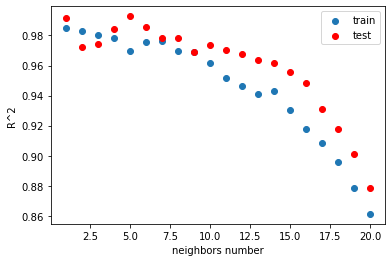

In [28]:
plt.scatter(neighbors_n,  r2_train, label = 'train')
plt.scatter(neighbors_n,  r2_test, c="r", label = 'test')
plt.xlabel('neighbors number')
plt.ylabel('R^2')
plt.legend()
plt.show()

## 확인문제

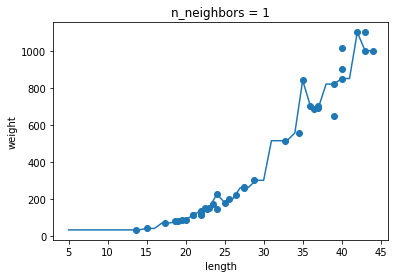

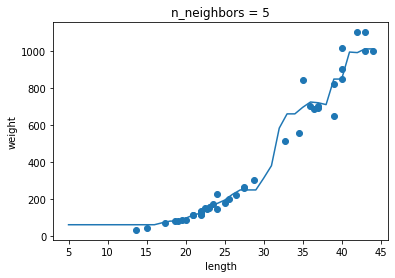

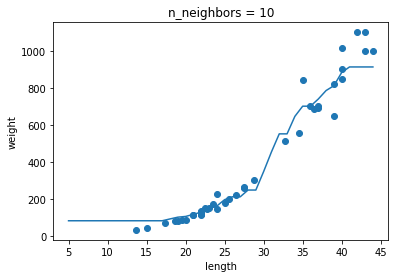

In [23]:
# k-최근접 이웃 회귀 객체를 만듭니다
knr = KNeighborsRegressor()
# 5에서 45까지 x 좌표를 만듭니다
x = np.arange(5, 45).reshape(-1, 1)

# n = 1, 5, 10일 때 예측 결과를 그래프로 그립니다.
for n in [1, 5, 10]:
    # 모델 훈련
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    # 지정한 범위 x에 대한 예측 구하기 
    prediction = knr.predict(x)
    # 훈련 세트와 예측 결과 그래프 그리기
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'.format(n))    
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()